# Course Notes: Business Experiments and Causal Methods

## Potential Outcomes

### Motivation

**Question: Does attending class in person cause a person to get an A grade (vs getting a grade lower than an A)?**

This is a causal question, because we are interested in knowing if the treatment, attending class in person, has an effect on the grade.

### Intuition

We know that some people attend class in person and some log in remotely. We also know what grade each person receives. Suppose that 70\% of people who attend class in person get an A but 30\% of people who attend remotely get an A. We can't say that going to class in person *causes* a higher grade. The reason is that people who go to class in-person may have other characteristics that cause them to get an A. For example, they could be more motivated or they may have more preparation for the class. The difference in characteristics between those who attend class and those who don't is called *selection bias*.

The gold standard for causal questions is a randomized clinical trial (RCT), because randomization solves the problem of selection bias.
An RCT ensures that, on average, the treatment is independent of the potential outcome.
But what is a potential outcome?

Suppose that *if* I receive treatment $T$, then I *will* get outcome $Y(T)$.
Instead, suppose that *if* I receive treatment $C$, then I *will* get outcome $Y(C)$.
My potential outcomes, therefore, are $Y(T)$ and $Y(C)$. Note, these outcome exist in theory. Which outcome I observe depends on which treatment I got in reality. The outcome that I *actually* observe depends on the treatment I receive.

Unfortunately, we can only observe one outcome, and so we can only observe one potential outcome.
This is the *fundamental problem of causal inference*.
Because of this, causal inference is a missing data problem.
An RCT provides a principled way to perform this imputation, but often we only have observational data.
In this case, the potential outcome framework is necessary because:

1. causal inference is subtle
2. it ensures we are working with a causal question
3. it helps us identify the causal claim

### Notation
For now, suppose that there are only two treatments, one of which we'll call the treatment (T = 1), and another which we'll call the control (T = 0).
We write that

\begin{align*}
Y_i(1) &\text{ is the potential outcome for person } i \text{ under treatment} \\
Y_i(0) &\text{ is the potential outcome for person } i \text{ under no treatment}
\end{align*}

Note that $i$ could also refer to a \textit{unit} when we are not working with people or patients.
In our example above, attending class in-person refers to treatment $(1)$, whereas not attending class in-person corresponds to no treatment $(0)$.
This notation will allow us to mathematically formulate our assumptions, as well identify our causal question and perform our analysis.

### Example

Back to our original question, suppose we know the potential outcomes of six people:

#### Table 1

| Person | $Y_i(1)$ | $Y_i(0)$ | $Y_i(1) - Y_i(0)$|
|:------:|:--------:|:--------:|:----------------:|
|    1   |     1    |     1    |       0          |
|    2   |     1    |     1    |       0          |
|    3   |     1    |     0    |       1          |
|    4   |     0    |     0    |       0          |
|    5   |     0    |     1    |       -1         |
|    6   |     0    |     0    |       0          |

where $Y_i(1) = 1$ is getting an A if person $i$ attends in-person and $Y_i(1) = 0$ is getting less than an A if person $i$ attends in-person.
Similarly, $Y_i(0) = 1$ is getting an A if person $i$ does not attend and $Y_i(0) = 0$ is getting less than an A if person $i$ does not attend.
Given the above, $Y_i(1) - Y_i(0)$ is the effect of attending class in person on the grade of person $i$.

In this case, we can see what the effect would be for each person.
In particular, persons 1 and 2 will get an A no matter their treatment; person 3 will be helped by treatment, i.e will get an A if they attend and will not get an A if they don't attend. Persons 4 and 6 will always get less than an A no matter their treatment; person 5 will be hurt by treatment.

In reality, we will never see both potential outcomes for each person.
Instead, we will observe something like this:

#### Table 2

| Person | $T_i$ | $Y_i$ |
|:------:|:-----:|:-----:|
|    1   |   1   |   1   |
|    2   |   1   |   1   |
|    3   |   1   |   1   |
|    4   |   0   |   0   |
|    5   |   0   |   1   |
|    6   |   0   |   0   |


where $A_i$ is the treatment for person $i$ and $Y_i$ is the observed outcome for person $i$. 
Thus, persons 1, 2, and 3 attend class in-person, whereas persons 4, 5, and 6 do not.
And persons 1, 2, 3, and 5 get an A, whereas persons 4 and 6 do not.
Using this observed data, we can partially fill out our potential outcomes table:

#### Table 3

| Person | $T_i$ | $Y_i$ | $Y_i(1)$ | $Y_i(0)$ | $Y_i(1) - Y_i(0)$ |
|:------:|:-----:|:-----:|:--------:|:--------:|:-----------------:|
| 1 | 1 | 1 | 1   | ??? | ??? |
| 2 | 1 | 1 | 1   | ??? | ??? |
| 3 | 1 | 1 | 1   | ??? | ??? |
| 4 | 0 | 0 | ??? | 0   | ??? |
| 5 | 0 | 1 | ??? | 1   | ??? |
| 6 | 0 | 0 | ??? | 0   | ??? |

The goal of causal inference is to fill in these missing values so that we can understand the effect of attending class on grades.
In the case of an RCT, we can estimate $Y_i(1)$ just through the outcomes of those treated, because randomization ensures the outcome is independent of the treatment.
Likewise for estimating $Y_i(0)$.
For observational studies, we will attempt to emulate a RCT, which will require us to make more assumptions.

Note that because of the fundamental problem of causal inference, we will never be able to know the treatment effects on an individual level.
That is, unlike Table 1, where we know the treatment effects for each person, Table 3 will only ever allow us to estimate average treatment effects.

## Average Treatment Effects

### Intuition

We've already established that we cannot know an individual's treatment effect. The reason is that we can't observe their outcome both when they do and do not get treated.[^1] What we can try to learn, however, is the average treatment effect in the sample of people we're considering.

Suppose we know the average potential outcome in the treated group and the average potential outcome in the control group. The difference in the average potential outcomes is the average treatment effect. Organizations often care about the average treatment effect. Let's say we are a political campaign and that we want to raise money. We have a choice of whether to send email A or email B. To determine which email to send, we need to know whether we raise more money when we send email A or B. In this case, we care about getting the highest average treatment effect. Note that it could be the case that for some individuals A causes more donations than B (and vice versa). However, the campaign cares about the sum of the donations.[^2]

Of course, we can't know the potential outcomes, we only know the realized outcomes. One thing we can do is compare realized outcomes for those who get email A with those who get email B. Typically, we'd be worried about selection bias. However, if we randomized who got email A and B, we can compare the difference in average realized outcomes to get an estimate of the average treatment effect. What do we mean by an estimate, think of it as the best guess, given the available data, that we have about the average treatment effect. An estimator is a procedure for getting the estimate. In this case, the estimator consists of taking the average donations of all those who got email A and subtracting the average donations of all those who got email B.

We now describe the above in more detail.

[^1]: You may wonder, can't a person get treated one day and not treated the next? This is a great question. We have to be very precise with what we mean by a potential outcome. We can't guarantee that a person's potential outcomes one day are the same as their potential outcomes the next. For example, suppose that you had a lot of sleep one day but not a lot of sleep the next. On the day when you had little sleep, going to lecture in-person may not have mattered as much as on a day with a lot of sleep. Therefore, the potential outcome is always defined with respect to the specific time at which a person gets treatment.

[^2]: This would be different if the campaign could target emails to different users. We will discuss this example later.

*Expectation* is the weighted average of all possible outcomes, where the weights are the probabilities with which the event happens.

For example, suppose we roll a die and $X$ is a random variable describing the value of the roll.
For a fair die, we have $f_X(x) = 1/6$ for all $x \in \Omega = \{1, 2, \ldots, 6\}$. That is, each of the 6 values is equally likely.
Then the expected value for $X$ is
\begin{align*}
\mathbb{E}[X] &= \sum_{x=1}^6 x \cdot \mathbb{P}(X = x) \\
&= 1 \cdot 1/6 + 2 \cdot 1/6 + \cdots + 6 \cdot 1/6 \\
&= 3.5
\end{align*}

Therefore, the expectation of $X$ is $3.5$.
It should be clear that even though this is the expected value of our die, it is not possible to actually obtain $3.5$.
So, while the expectation describes the "typical" outcome, it need not be observable.

Here are a few properties of expectation:

\begin{align*}
\mathbb{E}[a] &= a & \text{expectation of a constant} \\
\mathbb{E}[aX + bY] &= a\mathbb{E}[X] + b\mathbb{E}[Y] & \text{linearity of expectation}
\end{align*}

Another important concept is conditional expectation.
The *conditional expectation* of a random variable (RV) is its expectation given certain constraints (conditions) on the random variable.

For example, let $X$ be the RV above describing the die.
What is the expectation of $X$ given that we roll an even number?

\begin{align*}
\mathbb{E}[X | X \text{ is even}] &= 2\cdot \mathbb{P}(X = 2 | X \text{ is even}) + 4\cdot \mathbb{P}(X = 4 | X \text{ is even}) + 6\cdot \mathbb{P}(X = 6 | X \text{ is even}) \\
&= 2\cdot 1/3 + 4\cdot 1/3 + 6\cdot 1/3 \\
&= 4
\end{align*}

Note that we use the conditional probabilities to compute the conditional expectation.
In this case, we see that the conditional expectation of $X$ given $X$ is even is different than the expectation of $X$.

### ATE and ATT

Recall that by the fundamental problem of causal inference, we will never be able to infer individual treatment effects.
Instead, we can combine our potential outcomes framework with the notion of expectation to define the *average treatment effect* (ATE).
$$ATE = \mathbb{E}[Y_i(1)] - \mathbb{E}[Y_i(0)]$$
In words, the ATE is the difference between the expected outcomes under treatment versus no treatment.
In the case of randomized treatment, we can estimate the ATE as the difference in empirical means of the treated versus untreated, since randomization ensures the treatment is independent of the potential outcome. Here is the formal math. Let $T_{i}$ be the random variable that represents whether individual, i, is treated. 

\begin{align*}
\mathbb{E}[Y_i(1) | T_{i} = 1] &= \mathbb{E}[Y_i(1)] = \mathbb{E}[Y_i(1) | T_{i} = 0] \\
\mathbb{E}[Y_i(0) | T_{i} = 1] &= \mathbb{E}[Y_i(0)] = \mathbb{E}[Y_i(0) | T_{i} = 0]
\end{align*}

Hence, in a randomized setting, we have
$$ATE = \mathbb{E}[Y_i(1) | T_i = 1] - \mathbb{E}[Y_i(0) | T_i = 0]$$
We can estimate ATE using our standard estimator for means:
$$\widehat{ATE} = \frac{1}{m}\sum_{i=1}^N Y_i \cdot 1_{T_i = 1} - \frac{1}{N-m}\sum_{i=1}^N Y_i \cdot 1_{T_i = 0}$$
where $N$ is the number of people in our study, $m < N$ is the number of treated persons, and $1_{T = a}$ is the treatment indicator, i.e
$$1_{T = a} = \begin{cases}
1 & \text{if } T = a \\
0 & \text{if } T \neq a
\end{cases}$$
This estimator has the desirable property that it is unbiased.
For this to even make sense, we have to recognize that the estimator is a random variable, since the estimator is a function of the data, which is itself random.
Then, the estimator is unbiased if its expectation is equal to the parameter it is estimating.
In this case, that means $\mathbb{E}[\widehat{ATE}] = ATE$.

### Example

Let's return to our example data in Table 2.
Suppose the treatment were randomized.
Here, we estimate the ATE:

\begin{align*}
\widehat{ATE} &= \frac{1}{3}\sum_{i=1}^6 Y_i 1_{T_i = 1} - \frac{1}{3}\sum_{i=1}^6 Y_i 1_{T_i = 0} \\
&= \frac{1}{3} \cdot 3 - \frac{1}{3} \cdot 1 \\
&= 1 - \frac{1}{3} \\
&= \frac{2}{3}
\end{align*}

Since $\widehat{ATE} > 0$, we would interpret the treatment to be effective. Note that we put a $\widehat{hat}$ on a theoretical quantity to denote that something is an estimate of that quantity.

Here is code to do this in `Python`: (Please note we will use [`Pandas`](https://pandas.pydata.org/docs/index.html) to handle data)

In [1]:
# Load the module pandas to handle data frames
import pandas as pd 

# Create a DataFrame representing the data
data_po = {'person': [1, 2, 3, 4, 5, 6],
        'T': [1, 1, 1, 0, 0, 0],
        'Y': [1, 1, 0, 0, 1, 0],
        'Y0': [1, 1, 1, 0, 0, 0],
        'Y1': [1, 1, 0, 0, 1, 0]}

data_po = pd.DataFrame(data_po)

# Return the DataFrame
data_po

,person,T,Y,Y0,Y1
0,1,1,1,1,1
1,2,1,1,1,1
2,3,1,0,1,0
3,4,0,0,0,0
4,5,0,1,0,1
5,6,0,0,0,0


In [2]:
# Compute the ATE estimate
ate = data_po.loc[data_po['T'] == 1, 'Y'].mean() - data_po.loc[data_po['T'] == 0, 'Y'].mean()

ate

0.3333333333333333

In this code:

- `df.loc[df['T'] == 1, 'Y']` selects the values of 'Y' where 'T' is equal to 1.
- `df.loc[df['T'] == 0, 'Y']` selects the values of 'Y' where 'T' is equal to 0.
- `.mean()` calculates the mean of the selected values.

However, this is only a *point estimate* of ATE.

We should be wary of our conclusion, which only involved six individuals. For example, suppose that our randomization resulted in a different set of individuals being treated. In that case, our estimate of the ATE would be different. The bigger the number of individuals in our experiment, the less it matters what specific randomization occured. 

Next, we will see how to perform uncertainty quantification to assess how confident we should be about our estimate.

## Uncertainty Quantification

Suppose we flip a coin and it lands on heads.
Do we believe the coin is biased in favor of heads?
What if we flip it again and it lands on heads?
Is it biased now?
Intuitively, we believe that flipping a coin and landing on heads 92 times in a row is much more *evidence* towards bias than just twice.
But we can actually quantify how (un)likely such scenarios are, which allows us to perform *uncertainty quantification*.
Then, we can directly compare our observed results to the variation we would expect due to chance alone.

Below, we will discuss the following concents: variance and standard deviation, confidence intervals, and p-values. There are Python functions that can calculate these automatically, which we will discuss after explaining the concepts.


### Variance and Standard Deviation

The *variance* of a RV $X$ is its second central moment.
It is defined as the expectation of the squared difference from the mean $\mu = \mathbb{E}[X]$:
$$\sigma^2 = \text{Var}(X) = \mathbb{E}\big[(X - \mu)^2\big]$$
Intuitively, variance measures the spread of a RV about its mean.


Note that if a RV is described by a given unit of measurement, its variance is described by the squared unit.
For this reason, it is common to present the square root of the variance, which is known as the *standard deviation*:
$$\sigma = \sigma(X) = \sqrt{\text{Var}(X)}$$

If we know the distribution of our RV, or we have access to the whole population, then we can compute the *population* variance and standard deviation.
More often, we are given a sample $X_1, \ldots, X_n \sim X$, and we can only compute a *sample* variance or standard deviation similar to how we estimate the mean using the sample mean: 
$$\bar{X} = \frac{1}{n}\sum_{i=1}^n X_i$$
In this case, our sample variance and standard deviation are computed as follows:

\begin{align*}
s^2 &= \frac{1}{n-1}\sum_{i=1}^n\big(X_i - \bar{X}\big)^2 \\
s &= \sqrt{s^2} = \sqrt{\frac{1}{n-1}\sum_{i=1}^n\big(X_i - \bar{X}\big)^2}
\end{align*}

Note that we use the Latin $s$ to denote the sample estimators rather than the Greek $\sigma$.
This is similar to how we use $\bar{X}$ for the sample mean rather than $\mu$.
Also, note that in the calculation of sample variance, we divide by $n-1$ rather than $n$, as might be expected for an average.
This is so that our estimator is unbiased, but, for large $n$, the values are similar to dividing by $n$, which is what you do for the maximum likelihood estimator.


For large samples, calculating sample variance and standard deviation can be tedious.
However, the `Python` module `Numpy` has built-in the functions `numpy.var` and `numpy.std` that make these calculations easy.

In [3]:
import numpy as np

np.random.seed(472)  # set seed for reproducible results

n = 50

# X is a vector of 50 random numbers.
X = np.random.randn(n)  # sample X_1, ..., X_50 ~ Z = N(0, 1)

X_bar = np.mean(X)  # sample mean
X_var = np.sum((X - X_bar)**2) / (n - 1)  # sample variance
X_sd = np.sqrt(X_var)  # sample standard deviation

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'X_bar': [X_bar],
    'X_var': [X_var],
    'X_sd': [X_sd]
})

result_df

,X_bar,X_var,X_sd
0,-0.062594,0.888054,0.942366


In [4]:
# Check if X_var matches var(X) and X_sd matches sd(X)
var_match = X_var == np.var(X, ddof=1)  # ddof=1 for sample variance
sd_match = X_sd == np.std(X, ddof=1)    # ddof=1 for sample standard deviation

print(f"X_var matches var(X): {var_match}")
print(f"X_sd matches sd(X): {sd_match}")


X_var matches var(X): True
X_sd matches sd(X): True


### Confidence Intervals

One of the most important uses of variance and standard deviation is for building confidence intervals.
In our example above, we calculate that $\bar{X} \approx -0.06$ even though we know that $\mu = 0$.
We can build an interval around our sample mean, which is still our best guess for what $\mu$ is based on our sample, that incorporates the uncertainty that we expect from a single sample of size $n = 50$.
From the *Central Limit Theorem*, we know that the sampling distribution for $\bar{X}$ is normally distributed about $\mu$.
It follows that a confidence interval for $\bar{X}$ is
$$\Big(\bar{X} - z^*\frac{s}{\sqrt{n}}, \bar{X} + z^*\frac{s}{\sqrt{n}}\Big)$$
where $z^*$ is a *critical value* that depends on our desired level of confidence, usually expressed as $1 - \alpha$.
Typically, we use the values of $z^*$ given in Table 4.

#### Table 4

$\alpha$ | Confidence | $z^*$
--- | --- | ---
.01 | .99 | 2.576
.05 | .95 | 1.96
.1 | .90 | 1.645

In `Python`, we can use the `scipy.stats.norm` module to compute quantiles of the normal distribution:

In [5]:
from scipy.stats import norm

# note that the probability supplied in norm.ppf is not 1-alpha
# but instead 1 - alpha/2 because we have a two-sided conf. int.

conf_99 = norm.ppf(0.995)  # conf = 99%
conf_95 = norm.ppf(0.975)  # conf = 95%
conf_90 = norm.ppf(0.95)   # conf = 90%

result_df = pd.DataFrame({
    'Confidence': [.95, .99, .90],
    'z_star': [conf_99, conf_95, conf_90],
})

result_df

,Confidence,z_star
0,0.95,2.575829
1,0.99,1.959964
2,0.90,1.644854


The interpretation of this procedure is that for repeated samples of size $n$, by computing the confidence interval as above, we will capture the true population mean $100\times(1 - \alpha)\%$ of the time.
This does not mean that a given confidence interval has a $100\times(1 - \alpha)\%$ probability of containing the true parameter.

In summary, a confidence interval has the following components:

1. sample mean $\bar{X}$
2. sample standard deviation $s$
3. sample size $n$
4. confidence level $1-\alpha$

It is worth noting that, as experimenters, the only things we can control are the sample size $n$ and our desired confidence level $1-\alpha$.

As an example, here is the $95\%$ confidence interval from our sample using `Python`.

In [6]:
alpha = 0.05

# Confidence interval calculation
conf_interval = np.array([
    X_bar - norm.ppf(1 - alpha/2) * X_sd / np.sqrt(n),
    X_bar + norm.ppf(1 - alpha/2) * X_sd / np.sqrt(n)
])

print(conf_interval)

[-0.32379949  0.19861215]


### Hypothesis Testing

Instead of computing a confidence interval, we can express the same information through a *hypothesis test*.
That is, hypothesis testing is an alternative but equivalent framework to building confidence intervals.
The procedure for a hypothesis test is as follows:

1. State your null and alternative hypotheses, as well as your desired confidence level
2. compute your test statistic
3. find the p-value associated with the test statistic
4. compare p-value to $\alpha$
5. Note, we will illustrate these steps, but there are Python functions that do 1 - 4 automatically in one line. We discuss these afterward. 

A hypothesis test is best illustrated with an example.
Suppose $\bar{X}$ from above is actually an estimate for an average treatment effect, $\widehat{ATE}$.
Generally, a null hypothesis represents the status quo, so the null hypothesis is whatever the default position for the context of our experiment.
In this case, our null hypothesis is that there is no treatment effect, which we express as
$$H_0: ATE = 0$$
The alternative hypothesis is that there is an average treatment effect.
If we do not know the sign of the effect, then this is a two-tailed test, which we express as
$$H_A: ATE \neq 0$$
Note that our hypotheses are in terms of our population parameter rather than our sample estimator.

The next step is to compute a test statistic, which is a summary of our data based on the nature of the test.
For sample means including average treatment effect, the test when $n$ is large is the $Z$-test with corresponding $Z$-score:
$$Z = \frac{\bar{X} - \mu_0}{\text{SE}}$$
where $\bar{X}$ is our sample mean, $\mu_0$ is the mean *under the null hypothesis*, and $\text{SE} = \frac{\sigma}{\sqrt{n}}$ is the standard error.
Usually, we have $\mu_0 = 0$.

Once we have the test statistic, we compare it to the sampling distribution under the null, which, for a $Z$-test, is the standard normal distribution $Z = N(0, 1)$.
This comparison yields a p-value and if $p < \alpha$, we *reject* our null hypothesis in favor of the alternative hypothesis.
Otherwise, we *fail to reject* our null hypothesis because we do not have enough evidence in support of the alternative hypothesis.
There is a lot of misconception about p-values, but suffice to say their interpretation is as subtle as the interpretation for confidence intervals: a p-value is the probability that, if the null hypothesis were true, we would observe something as or more extreme than our actual observed data.

Going back to our example, here is how we would perform a test for $\widehat{ATE} = 0$ using `Python`.

In [7]:
# Calculate standard error
SE = X_sd / np.sqrt(n)

# Calculate z-score
Z = (X_bar - 0) / SE

# Calculate p-value
p = 2 * norm.cdf(- np.abs(Z)) # this is a two-sided test

# Check if we reject H_0
reject = p < alpha  # alpha = 0.05

print(f"Standard Error (SE): {SE}")
print(f"Z-score (Z): {Z}")
print(f"P-value (p): {p}")
print(f"Do we reject H_0? {reject}")

Standard Error (SE): 0.1332707243677306
Z-score (Z): -0.4696730554496753
P-value (p): 0.6385886212553631
Do we reject H_0? False


In our example, we see that $p \approx 0.64 > \alpha = 0.05$, hence we fail to reject the null hypothesis.
This means that we do not have enough evidence to support the hypothesis that there is an average treatment effect.
This coincides exactly to the fact that $\mu_0 = 0$ was contained in our $95\%$ confidence interval from above.

### Using Python to compute standard errors, confidence intervals, and p-values with one function.

The `Python` module `statsmodels.stats.weightstats` has built-in functions for statistical tests. The ttest_ind function calculates the confidence interval and p-value automatically.
We will now demonstrate how to compute the treatment effect estimate, confidence interval, and p-value using our table of outcomes `data_po`.

In [8]:
# Recall that this is our data:
data_po

,person,T,Y,Y0,Y1
0,1,1,1,1,1
1,2,1,1,1,1
2,3,1,0,1,0
3,4,0,0,0,0
4,5,0,1,0,1
5,6,0,0,0,0


In [9]:
from statsmodels.stats.weightstats import ttest_ind, _tconfint_generic

treated_sample = data_po[data_po['T'] == 1]['Y']
control_sample = data_po[data_po['T'] == 0]['Y']
tstat, pvalue, df = ttest_ind(x1 = treated_sample, x2 = control_sample, alternative = 'two-sided', usevar = 'pooled', value = 0) # df is the degree of freedom
reject = pvalue < alpha  # alpha = 0.05

print(f"t-score (t): {tstat}")
print(f"P-value (p): {pvalue}")
print(f"Do we reject H_0? {reject}")

mean_diff = np.mean(treated_sample) - np.mean(control_sample)
std_err_diff = np.sqrt(np.var(treated_sample, ddof=1)/len(treated_sample) + np.var(control_sample, ddof=1)/len(control_sample))

# Confidence level and critical t-value
confidence_level = 0.95
t_crit = 1.96

# Confidence interval
CI_lower = mean_diff - t_crit * std_err_diff
CI_upper = mean_diff + t_crit * std_err_diff

print(f"Confidence Interval: {CI_lower}, {CI_upper}")

t-score (t): 0.7071067811865475
P-value (p): 0.5185185185185183
Do we reject H_0? False
Confidence Interval: -0.5906195274170887, 1.2572861940837554


In the t-test, we have $p \approx 0.64 > \alpha = 0.05$, so we cannot reject the null hypothesis, which is the same conclusion we draw from the Z-test. Also, $\mu_0 = 0$ is contained in the confidence interval given by the t-text.

### Type I and II Errors

There are two types of error that can occur in hypothesis testing.
A *type I* error is a false positive, i.e., rejecting a true null hypothesis.
A *type II* error is a false negative, i.e., failing to reject a false null hypothesis.
Both of these error types also occur outside of hypothesis testing.
A type I error is sometimes called a *miscarriage of justice*, which is when someone is innocent but found guilty, while a type II error is called an *error of impunity*, since someone is guilty but found innocent.

#### Table:
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-lboi{border-color:inherit;text-align:left;vertical-align:middle}
.tg .tg-9wq8{border-color:inherit;text-align:center;vertical-align:middle}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky" colspan="2" rowspan="2"></th>
    <th class="tg-c3ow" colspan="2">Reality</th>
  </tr>
  <tr>
    <th class="tg-c3ow">Positive</th>
    <th class="tg-c3ow">Negative</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-9wq8" rowspan="2">Study<br>findings</td>
    <td class="tg-lboi">Positive</td>
    <td class="tg-0pky">True Positive<br>(Power / Sensitivity)<br>1-&#946</td>
    <td class="tg-0pky">False Positive<br>Type I error<br>&#945</td>
  </tr>
  <tr>
    <td class="tg-lboi">Negative</td>
    <td class="tg-0pky">False Negative<br>Type II error<br>&#946</td>
    <td class="tg-0pky">True Negative<br>(Specifity)<br>1-&#945</td>
  </tr>
</tbody>
</table>

Depending on the scenario, we may have different tolerances for type I and type II errors.
And ideally, we would like to minimize both of these errors, but there is a tradeoff between $\alpha$, which is the probability of a type I error, and $\beta$, which is the probability of a type II error.
A summary of these values is given in Table 5.
For modern hypothesis testing theory, tests are built to maximize power given our desired level of confidence, which is why we always pick $\alpha$.

A related notion is *power* or *sensitivity*, which is defined as $1 - \beta$.
By definition, this is the probability of rejecting the null hypothesis when the alternative hypothesis is true, i.e a true positive.
As we mentioned before, we can perform a power analysis to determine the sample size necessary to correctly reject the null hypothesis assuming a given effect size.

### Example

In this example, we look at *return on investment (ROI)*, which is defined as
$$\text{ROI} = \frac{\gamma m - c}{c}$$
where $\gamma$ is the effect on sales, $m$ is the margin, and $c$ is the cost per person.
Given a sample, we can estimate the effect on sales as the ATE, i.e $\hat{\gamma} = \widehat{ATE}$.
This also requires knowing the standard error of our estimated ATE, $\text{SE}(\widehat{ATE})$, which requires our sample size $n$, as well as the margin and the cost per person.

One way to use this is to find the number of observations needed to test if we meet our target ROI.
Note that
\begin{align*}
\text{SE}\left(\text{ROI}\right) &= \text{SE}\left(\frac{\gamma m - c}{c}\right) && \text{definition of ROI} \\
&= \frac{m}{c}\cdot\text{SE}\left(\gamma\right) && \text{rules of variance} \\
&= \frac{m}{c}\cdot\frac{\text{sd}(Sales)}{\sqrt{n}} && \text{definition of SE}
\end{align*}

Suppose we think that $\widehat{ATE} = \$.35$ with $\text{sd}\left(\widehat{Sales}\right) = \$75$.
Moreover, we know that $c = .14$ and $m = .5$.
How many observations do we need to show that ROI is significantly positive?
Furthermore, assume that we also know that the true ROI is $25\%$.
For our lower bound at a $95\%$ confidence level to be positive, which is equivalent to testing significance at $\alpha = .05$, we have:

\begin{align*}
.25 - 1.96\cdot\frac{.5}{.14}\cdot\frac{75}{\sqrt{n}} > 0 &\iff \sqrt{n} > 1.96\cdot\frac{.5}{.14}\cdot 75 \cdot \frac{1}{.25} \\
&\iff n > \Big(1.96\cdot\frac{.5}{.14}\cdot 75 \frac{1}{.25}\Big)^2 \\
&\iff n > 4,410,000
\end{align*}

Here is the code using `Python`.

In [10]:
# what we're assuming
sales_sd = 75
c = 0.14
m = 0.5
roi = 0.25

# # what levels we're testing
alpha = 0.05
z = norm.ppf(1 - alpha/2)

# necessary n to reject the null
n = np.ceil(((z * (m/c) * ate_sd) / roi)**2)

print(f"Necessary sample size: {n}")

NameError: name 'ate_sd' is not defined

Then, with $n=4409838$ sample size, what is the power $(1-\beta)$? In `Python`, `statsmodels.stats.power.TTestPower` can conviniently do a power analysis.

In [ ]:
from statsmodels.stats.power import TTestPower

roi_sd = (m/c) * sales_sd
effect_size = roi / roi_sd

TTestPower().power(effect_size = effect_size,
                    nobs = n, alpha = alpha, alternative='two-sided')

0.5000441215462467

We still have about 50% probability to commit type II error, which we call a power of 50%. When designing experiments, a common rule is to get another observations to achieve predicted power of 80%. How many samples do we need to achieve, say, 80% power?

In [ ]:
n = TTestPower().solve_power(effect_size = effect_size,
                            nobs = None, alpha = alpha, power = 0.8, alternative='two-sided')

print(f"Necessary sample size: {np.ceil(n)}")

Necessary sample size: 9010174.0


## Forms of Randomization:

There are several commonly used forms of randomization. The first one is called ''simple'' randomization. For this randomization, the assignment of a unit to the treatment and control is determined independently. For example, if one wants to treat 50% of the sample, one can flip a coin and if it is heads then the treatment is assigned. This form of randomization but does not exactly achieve the desired treatment probabilities. Just by chance, more or less than 50% of people may be assigned to the treatment.

The next form of randomization is ''complete'' randomization. Under complete randomization, one has a target number of treated units and exactly those units are randomized to treatment. This can be done, for example, by assigning each unit a random normal draw, and giving the treatment to the top N units based on the random draw. Complete randomization is especially useful when you have a limited number of treatments to assign due to a budget constraint, or when the sample size is small.

Another type of randomization is called blocking. Using the above two forms of randomization, one can by chance have imbalanace in covariates between treatment and control. For example, the treatment may have more men then women. Blocking eliminates this risk by completely randomizing within subgroups of the population. For example, if one wants to assign 10 out of 20 units to treatment. Then blocking would randomly select 5 men and randomly select 5 women to treatment. This would be called blocking on gender. Generally, the best variables to block on are ones that predict the outcome and for which imbalance could be a substantial problem. Blocking is an attempt to control this unwanted variability, which increases precision.

Another form of randomization is *cluster randomization*, whereby treatment is assigned at a group level.
For example, if treatment is a different teaching style, then necessarily entire classes are given the treatment at the same time.
Likewise for ad campaigns or product pricing.
Clustered random designs introduce dependency between the individuals within a cluster, which violates our independence assumption.
This needs to be taken into account in a regression, and generally results in lower power.

## Regression

Regression is a foundational method in statistics that relates to many other topics.
In particular, linear regression, which we focus on here, is often taught as its own course.
For this reason, we provide only a brief overview, but there are many excellent resources that explore the depth of this topic.

### Overview

Linear regression is a model that assumes a linear relationship between the dependent and independent variables.
We say that

\begin{align*}
Y &= \beta_0 + \beta_1X_1 + \beta_2X_2 + \cdots + \beta_pX_p + \varepsilon \\
&= \beta_0 + \sum_{i=1}^p \beta_pX_p + \varepsilon \\
&= X\beta + \varepsilon
\end{align*}
where $Y$ is the dependent variable or *response*, $X_1, \ldots, X_p$ are the independent or explanatory or predictor variables or *covariates*, $\beta_1, \ldots, \beta_p$ are the corresponding (regression) *coefficients*, $\beta_0$ is the *intercept* term, and $\varepsilon$ is the *noise*.
The noise, $\varepsilon$, is taken to be mean zero, and represents the deviations from perfect linearity, which could be an artifact of imprecise measurements, or more likely that the "true" relationship is being approximated linearly.

Given data $(X_1, Y_1), \ldots, (X_n, Y_n)$, our goal is to estimate the coefficients.
To do this, we use the method of ordinary least squares:
$$\hat{\beta}_{OLS} = \underset{\tilde{\beta}}{\arg\min} \sum_{i=1}^n (Y_i - \hat{Y}_i)^2$$
where $\hat{Y}_i = \tilde{\beta}_0 + \sum_{i=1}^n X_i\tilde{\beta}_i$.
This can be solved using calculus yielding the following closed-form solution:
$$\hat{\beta}_{OLS} = (X^TX)^{-1}X^TY$$
Under certain distributional assumptions, this solution is the same as the maximum likelihood estimate.

In linear regression, we make several assumptions but the following ones are most relevant for this class:

1. The response is a linear combination of the covariates and their regression coefficients.
2. There is no multicollinearity between the predictors.
3. If we want a causal interpretation of a coefficient on a variable x, the variable x should be independent of the error term. This would be violated in the case of selection bias.

These assumptions should be checked via diagnostic tools whenever possible.

There are two main uses of linear regression.
The first major use is inference.
Regression is very interpretable, so we can easily understand the relationships between the dependent and independent variables.
Moreover, we can use the regression setting to test if linear relationships exist (are they significant?) and if so, what are their effects (what is the magnitude of the estimated coefficient?). If we make the assumption of errors being independent of the covariaties, then we can interpret the coefficients in the regression as being causal.

The second major use is prediction.
We can use the regression coefficients to predict what the response would be given a certain set of covariates.
Next, we will discuss use cases specific to causal inference.

### Log Transformations

Critically, linear regression assumes a linear relationship between the response and the parameters.
But what if we plot the data and the relationship is more complex?
In some cases, we can use data transformations to recover linearity.
One of the most popular such transformations is the logarithm.
This is appropriate when the measurement of the response is on a logarithmic scale, which is multiplicative, rather than a linear scale.
For example, the magnitude of earthquakes is measured with the Richter scale, which is logarithmic.

In addition to transforming the response variable, it is also common to transform the covariates.
(Ask yourself why this does not violate the linearity assumption.)
Combinations of transformations of dependent and independent variables yield the following models:

\begin{align*}
Y &= \beta_0 + \beta_1 X + \varepsilon \tag{$M_1$} \\
\log Y &= \beta_0 + \beta_1 X  + \varepsilon \tag{$M_2$} \\
Y &= \beta_0 + \beta_1 \log X + \varepsilon \tag{$M_3$} \\
\log Y &= \beta_0 + \beta_1 \log X + \varepsilon \tag{$M_4$}
\end{align*}

These models have the following different coefficient interpretations:

- $(M_1)$ We expect a $\beta_1$ increase in $Y$ for every unit increase in $X$
- $(M_2)$ A unit increase in $X$ is expected to change $\log Y$ by $\beta_1$ or, equivalently, change $Y$ by $e^{\beta_1}$ for natural log. An approximation is that a z unit change in X changes Y by $\beta_{1} * z * 100$\%.
- $(M_3)$ $Y$ is expected to change by $\beta_1 \times \frac{k}{100}$ for every $k$\% increase in $X$.
- $(M_4)$ On average, a k\% change in X results in a $k \times \beta_{1}$\% change in Y.


### Interactions

We might wonder or expect that there is an *interactive* effect between two variables.
For example, suppose we have two binary covariates $x_1$ and $x_2$.
We could use the following model with an interaction $x_1x_2$:
$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \beta_3x_1x_2 + \varepsilon$$
In this case, it is easy to interpret the coefficients simply by checking the combinations of $x_1$ and $x_2$:
$$y = \begin{cases}
\beta_0 + \varepsilon & \text{ if } x_1 = x_2 = 0 \\
\beta_0 + \beta_1 + \varepsilon & \text{ if } x_1 = 1 \text{ and } x_2 = 0 \\
\beta_0 + \beta_2 + \varepsilon & \text{ if } x_1 = 0 \text{ and } x_2 = 1 \\
\beta_0 + \beta_1 + \beta_2 + \beta_3 + \varepsilon & \text{ if } x_1 = x_2 = 1
\end{cases}$$
Note that this is a saturated model, since there are as many parameters as variables, i.e
$$\widehat{\beta_0} = \frac{1}{\sum_{i=1}^n I(x_{i1} = x_{i2} = 0)}\sum_{i=1}^n y_i \cdot I(x_{i1} = x_{i2} = 0)$$
where $I(x_{i1} = x_{i2} = 0)$ is the indicator that subject $i$ has $x_1 = x_2 = 0$. If all of the variables are binary, then the predicted value of is just the mean of y (the outcome) for that combination of variables. 

In `Python`, we use the module [`PyFixest`](https://s3alfisc.github.io/pyfixest/tutorial/) and especially `pyfixest.estimation.feols`, in which an interaction can be included using the formula `y ~ x1 + x2 + x1:x2`.
Equivalently, you can use `y ~ x1 * x2`, which automatically includes the main effect terms. Alternatively, one can also use `statsmodels.api.OLS.from_formula`.

### Applications to Causal Inference

The first thing we can do with regression is estimate the ATE.
If we just want to see the relationship of the treatment on the outcome, then using regression will produce the same estimates as taking the difference of means.
However, regression has the advantage of being able to incorporate any covariates, which is necessary for observational studies, but also useful for randomized trials if the covariates are imbalanced by chance and small sample size.

Along those lines, we can also use regression to perform randomization tests (alternatively called balance checks).
It is impossible for the treatment to affect anything before the experiment, and we can use this temporal argument to test whether the experiment was implemented properly.
For example, the treatment should not affect demographics such as sex, race, or gender.
If we run regress one of these *fixed* values on the treatment and find the regression coefficient for the treatment is significant, then there may be a problem.
The most likely explanation is that the covariates are imbalanced.

In an experiment, if the sample is large enough, then the covariates should be balanced between treatment and control so that the only difference in outcome is due to the treatment.
This is the crux of randomization. However, we may have sampling constraints or want to ensure that certain covariates are balanced, which could lead us to sampling schemes other than simple random sampling.

### Example

Here, we present sample `Python` code for running a regression, performing diagnostics, and interpreting the output.
First, we consider the linear relationship $Y = \beta_0 + X\beta_1 + \varepsilon$, where $\beta_0 = 3, \ \beta_1 = 2$, and $\varepsilon \sim \mathcal{N}(0, 100)$.
The module [`Seaborn`](https://seaborn.pydata.org/index.html) has a convinient plotting function `lmplot` for linear models.

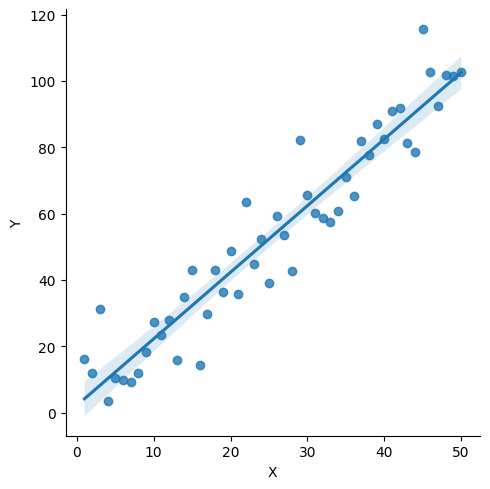

In [ ]:
import seaborn as sns

np.random.seed(472)  # set seed for reproducible results

n = 50
X = np.arange(1, n + 1)
eps = np.random.normal(scale=10, size=n)  # sample X_1, ..., X_50 ~ Z = N(0, 100)
Y = 3 + 2*X + eps  # beta_0 = 3 and beta_1 = 2
df = pd.DataFrame({'X': X, 'Y': Y})

sns.lmplot(data = df, x='X', y='Y')


We can see the relationship is linear, but not perfectly (no line passes through every point).
We can use linear regression to find the *line of best fit*, which is the one plotted.

In [ ]:
## Install pyfixest
# !pip install pyfixest

## The following two lines are used to force Jupyter display all outputs.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


from pyfixest.estimation import feols

model = feols("Y~X", data = df)

## use model.coef() and model.confint() to extract estimates and 95% confidence intervals

result = pd.DataFrame(model.coef()).reset_index()
result.merge(model.confint().reset_index(), on = 'Coefficient')

print(model.summary()) # full summary of our model

,Coefficient,Estimate,2.5 %,97.5 %
0,Intercept,2.201840,-3.294825,7.698505
1,X,2.006754,1.819155,2.194352


###

Estimation:  OLS
Dep. var.: Y
Inference:  iid
Observations:  50

| Coefficient   |   Estimate |   Std. Error |   t value |   Pr(>|t|) |   2.5 % |   97.5 % |
|:--------------|-----------:|-------------:|----------:|-----------:|--------:|---------:|
| Intercept     |      2.202 |        2.734 |     0.805 |      0.425 |  -3.295 |    7.699 |
| X             |      2.007 |        0.093 |    21.508 |      0.000 |   1.819 |    2.194 |
---
RMSE: 9.328   R2: 0.906
None


Alternatively, here's how we apply regressions using `statsmodels`.

In [ ]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
lm = sm.OLS.from_formula("Y~X", data = df)
fit = lm.fit()

print(f'The estimates are \n{fit.params}')
print(f'The standard errors are \n{fit.bse}')
#print(fit.summary())

# Stargazer is a function that nicely formats regression results:
Stargazer([fit])

The estimates are 
Intercept    2.201840
X            2.006754
dtype: float64
The standard errors are 
Intercept    2.733796
X            0.093303
dtype: float64


We see that our estimates for $\beta_0 = 3$ and $\beta_1 = 2$ are $\hat{\beta}_1 = 2.007$, which is close, and $\hat{\beta}_0 = 2.202$, which is not.
However, notice that the standard error for $\hat{\beta}_0$ is large, indicating that there is a lot of uncertainty around the estimate.
In fact, the corresponding p-value (.425) is much greater than any reasonable $\alpha$, so there is not much evidence for that estimate.
On the other hand, the standard error for $\hat{\beta}_1$ is quite small, as is its corresponding p-value.
And, as we should expect, the true value is captured in the 95% CI.
Note that our estimates improve if we take larger $n$ or smaller variance for $\varepsilon$.

### Conditional Average Treatment Effects (CATE) and Interaction Effects
We can also use regression to estimate conditional average treatment effects. A conditional average treatment effect given X is the average treatment effect for the subset of observations for which X is true. This can be estimated using an interaction regression. For example, suppose we want to measure the treatment effect conditional on X = 1. Let's simulate a dataset with a binary covairate X, a Treatment Y, and an interaction effect.

In [ ]:
np.random.seed(472)  # set seed for reproducible results
n = 50
X = np.random.rand(n) > 0.5
Treatment = np.random.rand(n) > 0.5
eps = np.random.normal(scale=0.3, size=n)  # sample X_1, ..., X_50 ~ Z = N(0, 100)

Y = 3 + 2 * X + 0.5 * Treatment + 0.2 * Treatment * X + eps  # beta_0 = 3 and beta_1 = 2

We can calculate the CATE by simply taking the difference in means between the set of observations with X = 1 that are either treated or not.

In [ ]:
CATE = np.mean(Y[(X == 1) & (Treatment == 1)]) - np.mean(Y[(X == 1) & (Treatment == 0)])

CATE

0.4506508989816904

Another way to do this is using a regression with an interaction effect and to add the coefficients on "Treatment" and "X:Treatment". Also note that the coefficeint on "Treatment" represents the treatment effect when X = 0 and the term "(Intercept)" is the mean of the outcome variable when X = 0 in the control group.

In [ ]:
# Creating a DataFrame
data = pd.DataFrame({'Y': Y, 'X': X, 'Treatment': Treatment})

lm = sm.OLS.from_formula("Y ~ X * Treatment", data = data)
fit_inter = lm.fit()

CATE = fit_inter.params['Treatment[T.True]'] + fit_inter.params['X[T.True]:Treatment[T.True]']
print(f'CATE is {CATE}')

# In the table below, we can compare the non-interacted model (1) and the interacted model (2).
Stargazer([fit, fit_inter])

CATE is 0.4506508989816913


## Non-Compliance

Randomization is the hammer that can help us overcome selection bias.
Until now, we have implicitly assumed that the treated and the control groups obey their assigned treatment status.
We call anyone who receives the treatment when they are assigned the treatment group a *complier*.


In some cases, we can directly ensure *compliance*, i.e treatment is taken by only and all of the treated group.
For example, if we want to test the effect of caffeine on memorization tasks, then we can randomly assign caffeinated and decaffeinated coffee to two groups.
Moreover, we can watch to make sure that all individuals drink the coffee they are given and do not drink any other coffee.


Unfortunately, many experiments are not (and cannot be) designed so that researchers can monitor if treatment status is obeyed.
Most of the time, non-compliance occurs when treatment is not taken by someone in the treated group rather than treatment being taken by someone in the control group.
Such cases are common if treatment is taken at home and we need to carefully account for these cases.
This practical component of causal inference is crucial to the success of our analyses.

### Intention to Treat

One simple approach to dealing with non-compliance is to measure the same quantity as ATE, but recognize that it is actually the *intent-to-treat effect* (ITT).
The ITT is therefore the average effect of being placed in the treatment group.


If we want to know the direct effect of the treatment, then obviously we would like to estimate ATE rather than ITT.
However, it is important to recognize that sometimes we are actually interested in ITT.
For example, if we want to understand the impact of a policy change such as free access to SAT preparatory classes, then ITT is more relevant than ATE.

### Complier Average Causal Effects

Instead of ITT, we can also calculate the *complier average causal effect* (CACE).
The CACE is the average treatment effect among the compliers.
If $T = \mathbb{E}[Y(1)], \ C = \mathbb{E}[Y(0)]$, and $\alpha$ is the *compliance rate*, then, assuming no effect on non-compliers, we can compute CACE as follows:

\begin{align*}
T - C &= \alpha\big(T_\text{compliers} - C_\text{compliers}\big) + (1-\alpha)\big(T_\text{non-compliers} - C_\text{non-compliers}\big) \\
&= \alpha\big(T_\text{compliers} - C_\text{compliers}\big)
\end{align*}
where $T_\text{non-compliers} = C_\text{non-compliers}$ is a consequence of our assumption of no effect on non-compliers.
Note that $T - C$ is just the ITT, or ATE if $\alpha = 1$.
Thus,

\begin{equation*}
\begin{split}
\text{CACE} &= \big(T_\text{compliers} - C_\text{compliers}\big) \\
& = \frac{1}{\alpha}(T - C) \\
& = \frac{ITT}{\alpha}
\end{split}
\end{equation*}

One observation from the CACE formula is that
$$\text{SE}(CACE) = \frac{\text{SE}(ITT)}{\alpha}$$
Since $\alpha \in [0, 1]$, we will need a much larger sample size for estimating CACE.
For example, if the compliance rate is $10\%$, then the standard errors are 10 times larger and we would need 100 times the sample size to reduce the standard errors accordingly. 


Technical note: the standard error computed above is not exactly correct.
If we want the correct standard error, we should use the `feols` function in `PyFixest` or conduct randomization inference.
You do not have to know how to do this.

Interpreting the above number as a CACE requires assumptions.
The first of these assumptions is that not receiving the treatment does not have an effect.
This would be violated in the following scenario.
Suppose people assigned to the treatment group expected to get the treatment but did not.
The assumption would be violated if this caused the people to become upset and to change their behavior as a result.

Another important assumption is that the treatment increases the probability of receiving the treatment for everyone.
This is by design in the voting example, but may be violated in other circumstances.

We can avoid computing CACE by identifying the compliers, which can be done via *placebos*.
A *placebo treatment* allows us to measure who would have complied.
For example, in the example of calling people to increase voter turnout, the placebo is a public service announcement.
The group that answers the phone call in the 'placebo' group would have been the compliers in the treatment group.
Therefore, we can directly compare the compliers in the placebo group and the compliers in the treatment group to compute the CACE.
This will give us more precise estimates when the compliance rate is low.

However, there are no free lunches and use of a placebo is both expensive and subject to further assumptions.
A key assumption is that the placebo treatment has no effect on the outcome.
A second key assumption is that the likelihood of compliance is the same in the treatment and placebo groups.
This assumption can be tested by looking at the realized compliance rates.

## Observational Data

Here, we discuss the difference-in-difference method for performing causal inference with observational data.

### Difference in Differences

In the early 1850s, a London doctor named John Snow went door to door to observe the presence of cholera.
Additionally, he tabulated the water supply source for each household.
His assumption was that "there is no difference whatever in the houses or the people receiving the supply of the two Water Companies, or in any of the physical conditions with which they are surrounded."
Therefore, Snow was able to compare cholera status in two groups that were similar except for their treatment.
In doing so, he was able to determine a causal link between water source and cholera being the first to establish cholera as a water-borne disease.

The crucial step in this analysis is that if two groups are similar except for treatment, then any differences in outcomes between the groups is due to the treatment.
This methodology is known as *difference in differences* (DID).
If $Y_{it}$ is our response for group $i$ at time $t$, then the difference in differences is calculated as
$$DID = \left(Y_{1, \ \text{post}} - Y_{0, \ \text{post}}\right) - \left(Y_{1, \ \text{pre}} - Y_{0, \ \text{pre}}\right)$$


One important assumption for the difference in differences method is the *assumption of parallel trends*, which says that without treatment, the difference between the treatment and control group is constant over time.
This assumption cannot be tested statistically, but it is important to visualize the relationship if observations are available over time.
In particular, you want to see that the pre-intervention relationship between treatment and control group is in lockstep, i.e any deviations only occur post-intervention.


We can use simple algebra to demonstrate why the difference in differences estimator works.
Consider the setting of brand keyword advertising in search engines.
Suppose that Ebay turns off its ads on Bing but keeps them on Google.
Furthermore, suppose that the log of clicks can be expressed as follows:
$$E[Y_{it}] = \gamma_{i} + \lambda_{t} + \delta T_{it}$$
or in words:
$$E[\text{Log}(\text{Clicks for Search Engine $i$ in time period $t$})] = \gamma_{i} + \lambda_{t} + \delta T_{it}$$

Suppose there are two periods (before and after), then we can show that the simple difference in differences results in an unbiased estimate of $\delta$, the treatment effect. 
\begin{align*}
&E[Y_{\text{Bing, After}} - Y_{\text{Google, After}}] - E[Y_{\text{Bing, Before}} - Y_{\text{Google, Before}}]\\
=& (\gamma_{\text{Bing}} + \lambda_{\text{After}} + \delta - \gamma_{\text{Google}} - \lambda_{\text{After}}) - (\gamma_{\text{Bing}} + \lambda_{\text{Before}} - \gamma_{\text{Google}} - \lambda_{\text{Before}})\\
=&(\gamma_{\text{Bing}} + \delta - \gamma_{\text{Google}}) - (\gamma_{\text{Bing}} - \gamma_{\text{Google}}) = \delta.
\end{align*}
